In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

In [2]:
from matplotlib.pylab import rcParams

In [4]:
rcParams['figure.figsize'] = 15,6 ## Eixo horizontal para ficar maior

# Série anual

## Criando uma série

In [7]:
# 1980 a 2020
np.random.seed(10)
dados1 = np.random.normal(0,1,41) #(0 media, 1 desvio padrão, 41 anos de 1980 a 2020)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [8]:
type(dados1)

numpy.ndarray

In [9]:
# transformar em serie
serie = pd.Series(dados1)

In [10]:
type(serie)

pandas.core.series.Series

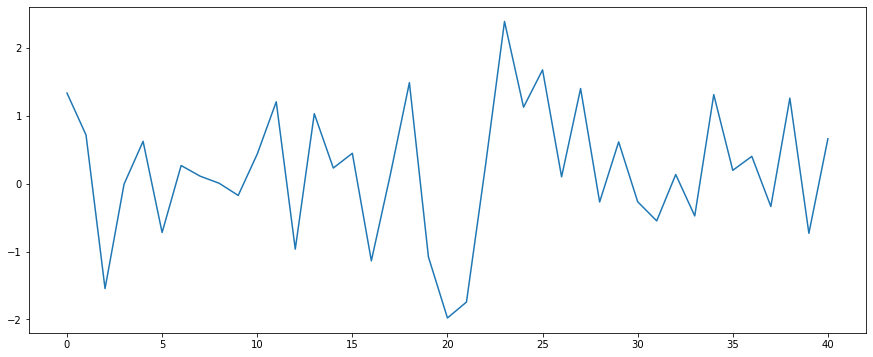

In [11]:
serie.plot()
plt.show()

In [13]:
# Colocar os anos no eixo X
dados1 = pd.DataFrame(dados1)


In [15]:
dados1.columns=['valores'] #nomeando coluna

In [17]:
dados1.describe()

,valores
count,41.000000
mean,0.183670
std,0.964847
min,-1.977728
25%,-0.337632
50%,0.195013
75%,0.715279
max,2.384967


In [18]:
# Podemos ver que a media está proxima de 50% que é mediana

In [20]:
indice = pd.date_range('1980',periods= len(dados1), freq='Y') # começa em 1980 segue todas linhas na frequencia de ano Y
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [21]:
serie1 = pd.Series(dados1['valores'].values, index=indice)
serie1.head()

1980-12-31    1.331587
1981-12-31    0.715279
1982-12-31   -1.545400
1983-12-31   -0.008384
1984-12-31    0.621336
Freq: A-DEC, dtype: float64

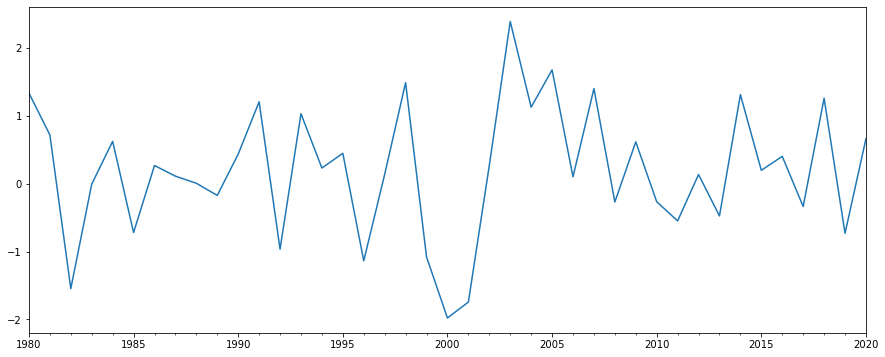

In [22]:
serie1.plot()
plt.show()

# Verificando se é distribuição normal

In [23]:
import scipy.stats as stats

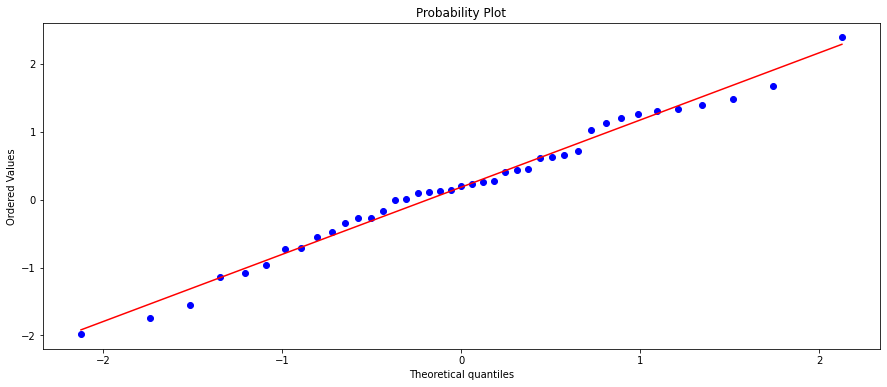

In [24]:
stats.probplot(serie1, dist='norm', plot=plt)
plt.show()

## Calculando com valores  Shapiro-Wiki

In [25]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(serie1)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9869343638420105
p-valor: 0.9118920564651489


In [26]:
# deu maior que 0,05 apontando que temos uma distribuição normal

# Serie Mensal

In [27]:
np.random.seed(6)
dados2 = np.random.normal(0,1,72)
dados2

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

In [28]:
type(dados2)

numpy.ndarray

In [29]:
dados2 = pd.DataFrame(dados2)

In [30]:
dados2.columns = ['valores']

In [31]:
dados2.describe()

,valores
count,72.000000
mean,0.092709
std,1.022496
min,-2.486781
25%,-0.567756
50%,0.151507
75%,0.814155
max,2.631281


In [32]:
import datetime

In [33]:
data = np.array('2015-01',dtype= np.datetime64())
data

array('2015-01', dtype='datetime64[M]')

In [34]:
data = data + np.arange(72)
data

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype='datetime64[M]')

In [35]:
data = pd.DataFrame(data)

In [36]:
data

,0
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
...,...
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01


In [37]:
data.columns = ['data']

In [38]:
data

,data
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
...,...
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01


In [39]:
serie2 = pd.concat([data,dados2], axis = 1)
serie2

,data,valores
0,2015-01-01,-0.311784
1,2015-02-01,0.729004
2,2015-03-01,0.217821
3,2015-04-01,-0.899092
4,2015-05-01,-2.486781
...,...,...
67,2020-08-01,-1.014648
68,2020-09-01,-2.132323
69,2020-10-01,0.173863
70,2020-11-01,0.951201


In [40]:
# Criando serie - não pode ser DataFrame
serie2 = pd.Series(serie2['valores'].values, index= serie2['data'])
serie2

data
2015-01-01   -0.311784
2015-02-01    0.729004
2015-03-01    0.217821
2015-04-01   -0.899092
2015-05-01   -2.486781
                ...   
2020-08-01   -1.014648
2020-09-01   -2.132323
2020-10-01    0.173863
2020-11-01    0.951201
2020-12-01    0.441897
Length: 72, dtype: float64

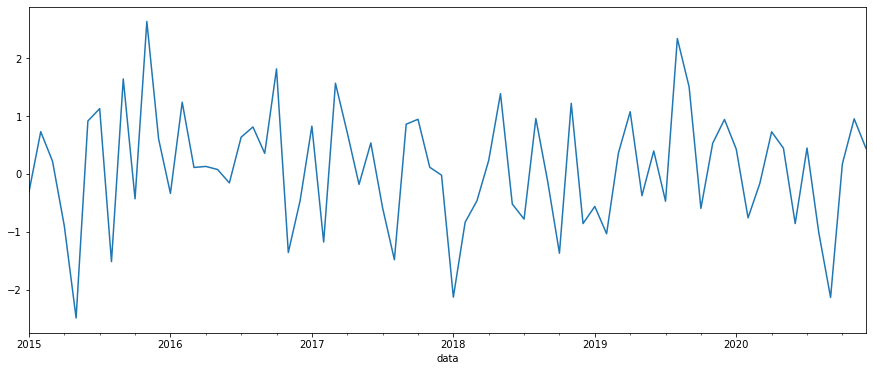

In [41]:
serie2.plot()
plt.show()

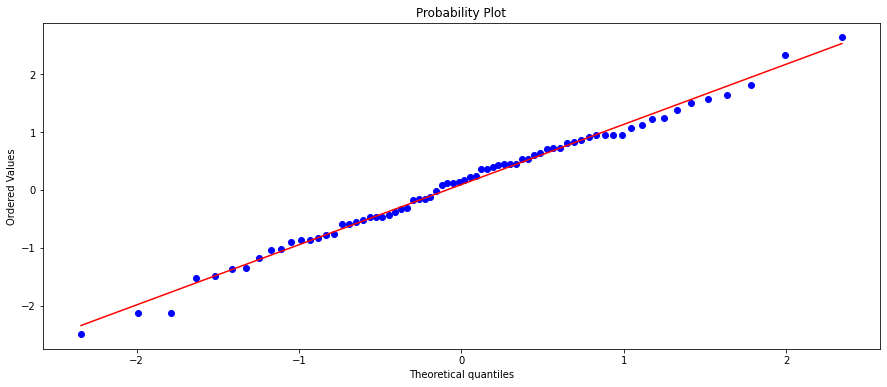

In [43]:
stats.probplot(serie2, dist='norm', plot=plt)
plt.show()

In [44]:
# p > 0,05 ou 5% 
e, p = stats.shapiro(serie2)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9929385185241699
p-valor: 0.9612157940864563


# Série Diária

In [52]:
np.random.seed(12)
dados3= np.random.normal(0,1,731)


In [47]:
dados3 = pd.DataFrame(dados3)

In [48]:
dados3.columns=['valores']

In [49]:
indice3 = pd.date_range('2019 Jan 1', periods = len(dados3), freq= 'D')

In [50]:
serie3 = pd.Series(dados3['valores'].values, index = indice3)

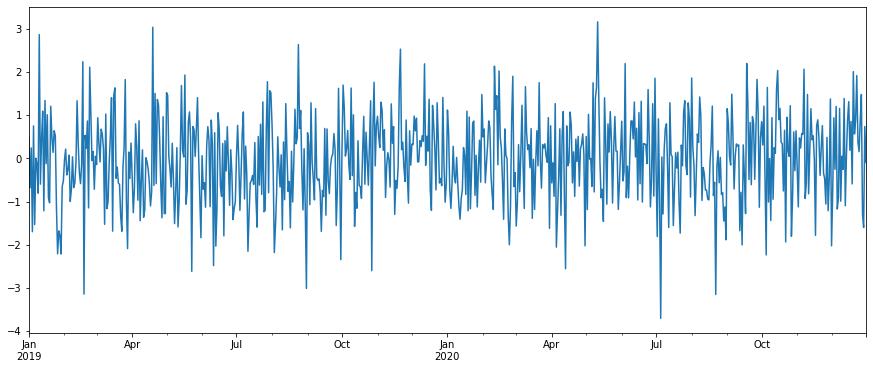

In [51]:
serie3.plot()
plt.show()

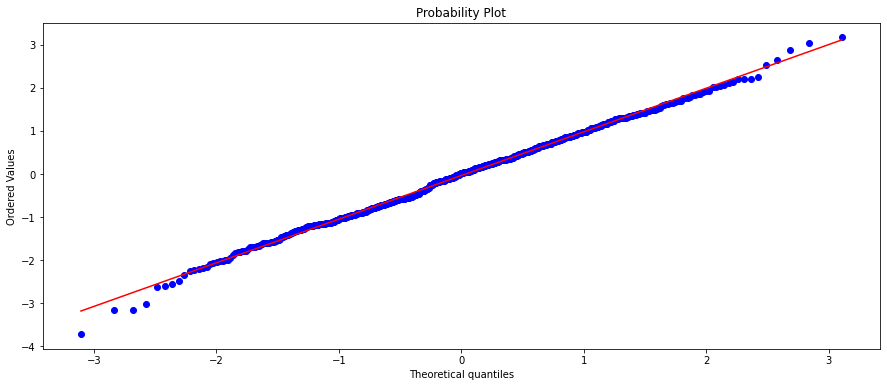

In [53]:
stats.probplot(serie3, dist='norm', plot=plt)
plt.show()

In [55]:
e, p = stats.shapiro(serie3)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.997778058052063
p-valor: 0.44898200035095215


# Teste de Estacionaridade

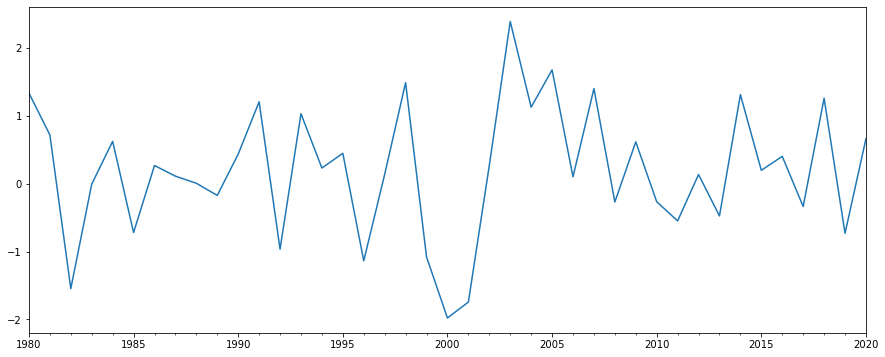

In [56]:
#Usando serie1 como exemplo
serie1.plot()
plt.show()

In [57]:
import statsmodels.tsa.stattools

## Teste KPSS

In [58]:
# H0 - Não é estácionario - estatistica do teste > Valor crítico
# Ha - é estacionário - estatistica do teste < Valor critico

In [60]:
statsmodels.tsa.stattools.kpss(serie1)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.19177457678751522,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [63]:
# Primeiro valor = Estatistica do teste
# Segundo valor = p valor
# Terceiro = lags (outros parâmetros da função)
# Porcentagens = tipos críticos - normalmente usa-se 5%


In [64]:
# 0,19 < 0,463
# teste est < Valor crítico 
# Então é estácionaria

In [65]:
statsmodels.tsa.stattools.adfuller(serie1)

(-5.864177001394796,
 3.355671788520751e-07,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 90.17324024534712)

# Passeio Aleatório

In [67]:
from random import sample, random

# Função de autocorrelação 

In [69]:
# Quando existe uma relação com os própios dados da serie
# Se naão existe auto correlação é um processo puramente aleatório

# Ruido Branco AULA 39

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

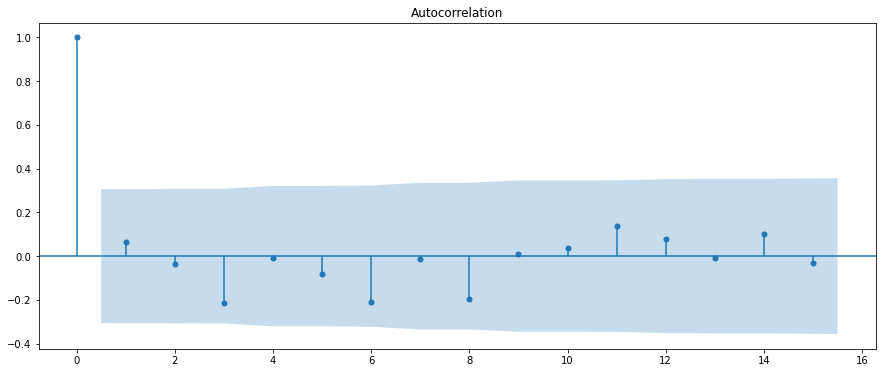

In [71]:
plot_acf(serie1, lags=15);

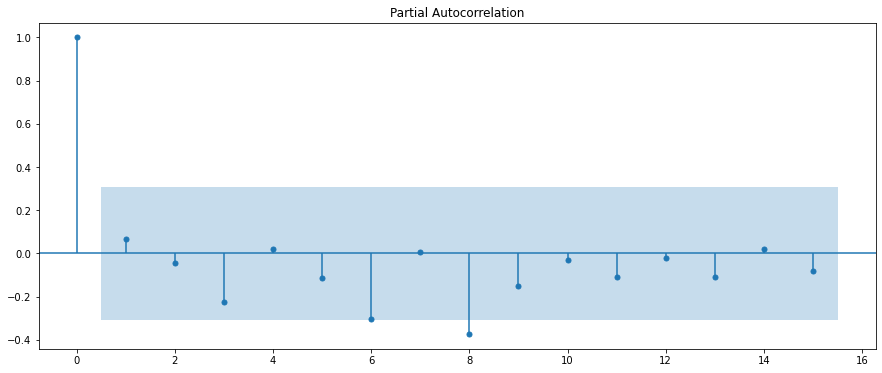

In [72]:
plot_pacf(serie1, lags=15);